In [1]:

# --- Author -----   Ramkumar M ---------------------
# Analysis for the dataset - Kddcup99
# Prediction model for r2l_attack


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
np.set_printoptions(threshold=sys.maxsize)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression


import xgboost as xgb
from sklearn.decomposition import PCA

# Loading the data , Provide the path accordingly

In [4]:
data = pd.read_csv(r"D:\Python\Others\CODEMENTR\rl attack\source2\data\kddcup99_csv.csv")

In [5]:
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0               0       0    0                  0          1   
1               0       0    0                  0          1   
2               0       0    0                  0          1   
3               0       0    0                  0          1   
4               0       0    0                  0          1   

   lnum_compromised  lroot_shell  lsu_attempted  lnum_root  \
0                 0            0              0          0   
1                 0            0              0          0   
2                 0            0              0          0   
3                 0            0              0          0   
4                 0            0              0          0   

   lnum_file_creations  lnum_shells  lnum_access_files  lnum_outbound_cmds  \
0                    0            0                  0                   0   
1                    0            0                  0                   0   
2                    0            0                  0                   0   
3                    0            0                  0                   0   
4                    0            0                  0                   0   

   is_host_login  is_guest_login  count  srv_count  serror_rate  \
0              0               0      8          8          0.0   
1              0               0      8          8          0.0   
2              0               0      8          8          0.0   
3              0               0      6          6          0.0   
4              0               0      6          6          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0              0.0          0.0              0.0            1.0   
1              0.0          0.0              0.0            1.0   
2              0.0          0.0              0.0            1.0   
3              0.0          0.0              0.0            1.0   
4              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                  

In [6]:
# Missing values on the dataset

In [7]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
# Unique labels in the target values

In [9]:
data.label.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

# Approach  - 

1. Converting Label into two classes - Normal and r2l_attack
2. Clubing all types of r2l_attack into one class
3. Converting into Binary Classification Problem with two class - "Normal" , "r2l_attack"


Methods used in this approach 

Algorithms -
1. Random Forest 
2. Logistic Regression
3. XGboost


feature Engineering
1. Correlation Matrix and remove highly correlated features
2. Label Encoding to encode categorical variables
3. With PCA and Without PCA

In [13]:
# Clubing all r2l attacks into one class - r2l_attack
# Creating the dictionary for the mapping and replace the values in the Target Columns

In [14]:
dict1 = {"ftp_write" : "r2l_attack" , 'guess_passwd' : "r2l_attack" , "imap" : "r2l_attack" , 'multihop' : "r2l_attack"
, 'phf' : "r2l_attack" , 'spy' :"r2l_attack" , 'warezclient' :"r2l_attack" ,  'warezmaster' : "r2l_attack" }

In [15]:
dict1

{'ftp_write': 'r2l_attack',
 'guess_passwd': 'r2l_attack',
 'imap': 'r2l_attack',
 'multihop': 'r2l_attack',
 'phf': 'r2l_attack',
 'spy': 'r2l_attack',
 'warezclient': 'r2l_attack',
 'warezmaster': 'r2l_attack'}

In [16]:
data.label.replace(dict1).unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'r2l_attack', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'back', 'satan', 'nmap', 'rootkit'], dtype=object)

In [17]:
data.label = data.label.replace(dict1)

In [11]:
len(data[(data.label == 'normal') | (data.label == 'r2l_attack')])

98403

In [18]:
# Filtering the dataset based on the r2l_attack and Normal transaction

In [19]:
data_r2l = data[(data.label == 'normal') | (data.label == 'r2l_attack')]

In [20]:
data_r2l.label.unique()

array(['normal', 'r2l_attack'], dtype=object)

In [21]:
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0               0       0    0                  0          1   
1               0       0    0                  0          1   
2               0       0    0                  0          1   
3               0       0    0                  0          1   
4               0       0    0                  0          1   

   lnum_compromised  lroot_shell  lsu_attempted  lnum_root  \
0                 0            0              0          0   
1                 0            0              0          0   
2                 0            0              0          0   
3                 0            0              0          0   
4                 0            0              0          0   

   lnum_file_creations  lnum_shells  lnum_access_files  lnum_outbound_cmds  \
0                    0            0                  0                   0   
1                    0            0                  0                   0   
2                    0            0                  0                   0   
3                    0            0                  0                   0   
4                    0            0                  0                   0   

   is_host_login  is_guest_login  count  srv_count  serror_rate  \
0              0               0      8          8          0.0   
1              0               0      8          8          0.0   
2              0               0      8          8          0.0   
3              0               0      6          6          0.0   
4              0               0      6          6          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0              0.0          0.0              0.0            1.0   
1              0.0          0.0              0.0            1.0   
2              0.0          0.0              0.0            1.0   
3              0.0          0.0              0.0            1.0   
4              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                  

# Exploratory Data Analysis

In [22]:
len(data_r2l.columns)

42

In [27]:
data_r2l.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  98403.00000  9.840300e+04  9.840300e+04  98403.000000         98403.0   
mean     220.58547  4.255928e+03  4.173305e+03      0.000010             0.0   
std     1370.58023  1.304221e+05  7.392756e+04      0.003188             0.0   
min        0.00000  0.000000e+00  0.000000e+00      0.000000             0.0   
25%        0.00000  1.470000e+02  1.310000e+02      0.000000             0.0   
50%        0.00000  2.320000e+02  4.140000e+02      0.000000             0.0   
75%        0.00000  3.150000e+02  2.126000e+03      0.000000             0.0   
max    58329.00000  5.135678e+06  5.155468e+06      1.000000             0.0   

             urgent           hot  num_failed_logins     logged_in  \
count  98403.000000  98403.000000       98403.000000  98403.000000   
mean       0.000061      0.128563           0.000752      0.721289   
std        0.011928      1.723589           0.034621      0.448367   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      1.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000     30.000000           5.000000      1.000000   

       lnum_compromised   lroot_shell  lsu_attempted     lnum_root  \
count      98403.000000  98403.000000   98403.000000  98403.000000   
mean           0.028993      0.000295       0.000183      0.056573   
std            4.026384      0.017165       0.017460      4.509134   
min            0.000000      0.000000       0.000000      0.000000   
25%            0.000000      0.000000       0.000000      0.000000   
50%            0.000000      0.000000       0.000000      0.000000   
75%            0.000000      0.000000       0.000000      0.000000   
max          884.000000      1.000000       2.000000    993.000000   

       lnum_file_creations   lnum_shells  lnum_access_files  \
count         98403.000000  98403.000000       98403.000000   
mean              0.005020      0.000478           0.005051   
std               0.213456      0.022310           0.081555   
min               0.000000      0.000000           0.000000   
25%               0.000000      0.000000           0.000000   
50%               0.000000      0.000000           0.000000   
75%               0.000000      0.000000           0.000000   
max              28.000000      2.000000           8.000000   

       lnum_outbound_cmds  is_host_login  is_guest_login         count  \
count             98403.0        98403.0    98403.000000  98403.000000   
mean                  0.0            0.0        0.006961      8.084855   
std                   0.0            0.0        0.083143     17.625552   
min                   0.0            0.0        0.000000      0.000000   
25%                   0.0            0.0        0.000000      1.000000   
50%                   0.0            0.0        0.000000      3.000000   
75%                   0.0            0.0        0.000000     10.000000   
max                   0.0            0.0        1.000000    511.000000   

          srv_count   serror_rate  srv_serror_rate   rerror_rate  \
count  98403.000000  98403.000000     98403.000000  98403.000000   
mean      10.837668      0.001699         0.001895      0.055825   
std       21.736145      0.029675         0.028170      0.228810   
min        0.000000      0.000000         0.000000      0.000000   
25%        1.000000      0.000000         0.000000      0.000000   
50%        4.000000      0.000000         0.000000      0.000000   
75%       13.000000      0.000000         0.000000      0.000000   
max      510.000000      1.000000         1.000000      1.000000   

       srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
count      98403.00000   98403.000000   98403.000000        98403.000000   
mean           0.05612     

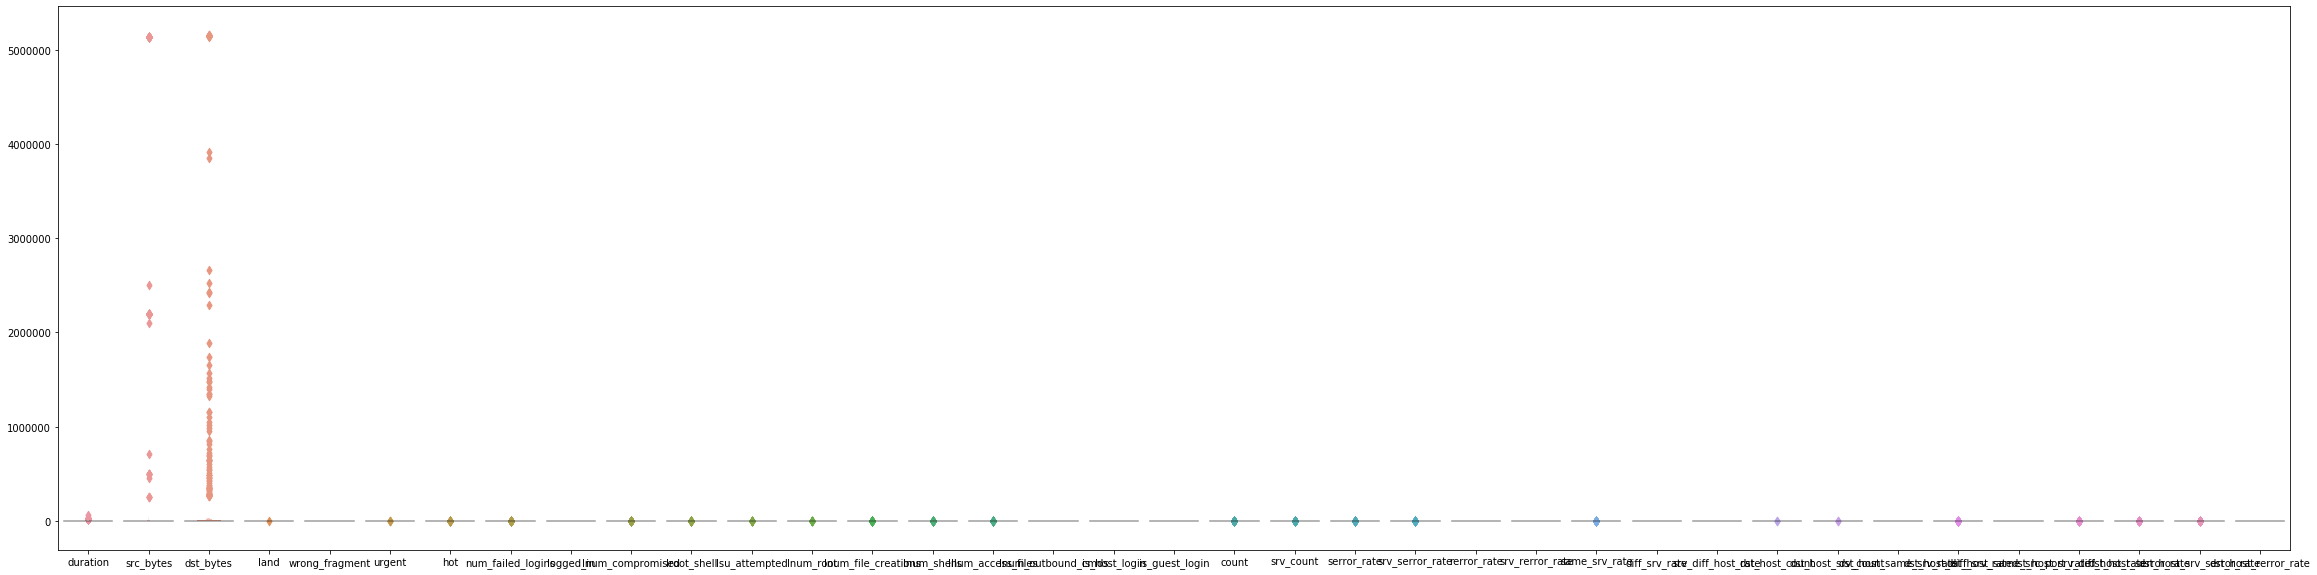

In [33]:
plt.figure(figsize= (40  , 10))
sns.boxenplot(data= data_r2l.iloc[: , 0:40])

# Feature Engineering

1. Identifying highly correlated features and removing one of them from the pair

2. Use label Encoding to encode categorical Features

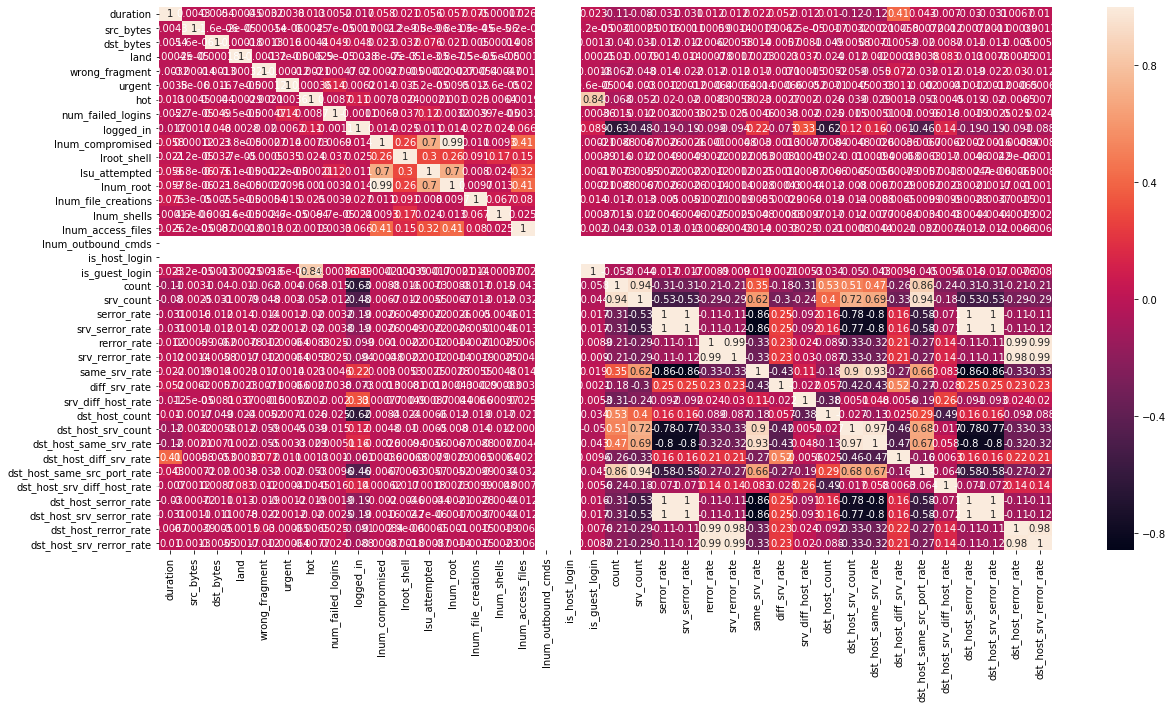

In [15]:
plt.figure(figsize= (20  , 10))
sns.heatmap(data.corr() , annot= True)

# Correlation Matrix with Highly Correlated Features

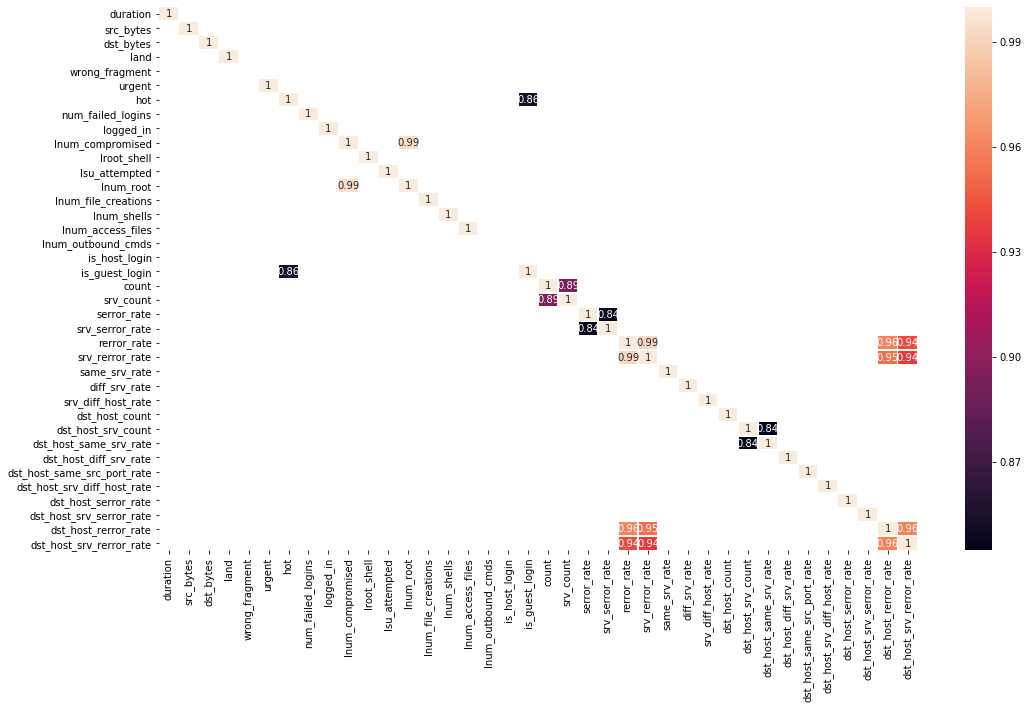

In [16]:
plt.figure(figsize= (17  , 10))
sns.heatmap(data_r2l.corr()[data_r2l.corr() > 0.75] , annot= True , linewidths=.5)

# From the correlation plot , we can observe following features as highly correlated

1. "is_guest_login" , "hot"
2. "srv_serror_rate" and "serror_rate"
3. 'dst_host_rerror_rate'  and 'dst_host_srv_rerror_rate'
4. 'srv_count' and 'count'
5. 'ium_root' and 'inum_compromised'

In [34]:
data_r2l.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

# Drop Features that are highly Correlated

In [35]:
data_r2l = data_r2l.drop(["hot" , "serror_rate" , "dst_host_serror_rate" , "count" , "lnum_root"] , axis=1)

In [36]:
data_r2l[data_r2l.columns[data_r2l.dtypes == object]].head()



protocol_type service flag   label
0           tcp    http   SF  normal
1           tcp    http   SF  normal
2           tcp    http   SF  normal
3           tcp    http   SF  normal
4           tcp    http   SF  normal

In [37]:
data_r2l.service.unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'pop_3', 'ftp_data', 'ssh',
       'domain', 'private', 'login', 'imap4', 'time', 'shell', 'IRC',
       'urh_i', 'X11', 'urp_i', 'tftp_u', 'tim_i', 'red_i'], dtype=object)

In [38]:
data_r2l.flag.unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'OTH', 'SH'],
      dtype=object)

In [39]:
data_r2l.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

# Labelencoding to Encode categorical features

In [40]:
label_encoder = LabelEncoder()

In [41]:
#label_encoder.fit_transform(data_r2l.service)

In [42]:
data_r2l_copy = data_r2l

In [43]:
data_r2l.service = label_encoder.fit_transform(data_r2l.service)

In [44]:
data_r2l.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           tcp       10   SF        181       5450     0   
1         0           tcp       10   SF        239        486     0   
2         0           tcp       10   SF        235       1337     0   
3         0           tcp       10   SF        219       1337     0   
4         0           tcp       10   SF        217       2032     0   

   wrong_fragment  urgent  num_failed_logins  logged_in  lnum_compromised  \
0               0       0                  0          1                 0   
1               0       0                  0          1                 0   
2               0       0                  0          1                 0   
3               0       0                  0          1                 0   
4               0       0                  0          1                 0   

   lroot_shell  lsu_attempted  lnum_file_creations  lnum_shells  \
0            0              0                    0            0   
1            0              0                    0            0   
2            0              0                    0            0   
3            0              0                    0            0   
4            0              0                    0            0   

   lnum_access_files  lnum_outbound_cmds  is_host_login  is_guest_login  \
0                  0                   0              0               0   
1                  0                   0              0               0   
2                  0                   0              0               0   
3                  0                   0              0               0   
4                  0                   0              0               0   

   srv_count  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          8              0.0          0.0              0.0            1.0   
1          8              0.0          0.0              0.0            1.0   
2          8              0.0          0.0              0.0            1.0   
3          6              0.0          0.0              0.0            1.0   
4          6              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    label  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal

In [45]:
data_r2l[data_r2l.columns[data_r2l.dtypes == object]].head()

protocol_type flag   label
0           tcp   SF  normal
1           tcp   SF  normal
2           tcp   SF  normal
3           tcp   SF  normal
4           tcp   SF  normal

In [46]:
data_r2l.protocol_type = label_encoder.fit_transform(data_r2l.protocol_type)

In [47]:
data_r2l.flag = label_encoder.fit_transform(data_r2l.flag)

In [48]:
data_r2l.label = label_encoder.fit_transform(data_r2l.label)

In [49]:
data_r2l[data_r2l.columns[data_r2l.dtypes == object]].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [50]:
data_r2l.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       10     8        181       5450     0   
1         0              1       10     8        239        486     0   
2         0              1       10     8        235       1337     0   
3         0              1       10     8        219       1337     0   
4         0              1       10     8        217       2032     0   

   wrong_fragment  urgent  num_failed_logins  logged_in  lnum_compromised  \
0               0       0                  0          1                 0   
1               0       0                  0          1                 0   
2               0       0                  0          1                 0   
3               0       0                  0          1                 0   
4               0       0                  0          1                 0   

   lroot_shell  lsu_attempted  lnum_file_creations  lnum_shells  \
0            0              0                    0            0   
1            0              0                    0            0   
2            0              0                    0            0   
3            0              0                    0            0   
4            0              0                    0            0   

   lnum_access_files  lnum_outbound_cmds  is_host_login  is_guest_login  \
0                  0                   0              0               0   
1                  0                   0              0               0   
2                  0                   0              0               0   
3                  0                   0              0               0   
4                  0                   0              0               0   

   srv_count  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          8              0.0          0.0              0.0            1.0   
1          8              0.0          0.0              0.0            1.0   
2          8              0.0          0.0              0.0            1.0   
3          6              0.0          0.0              0.0            1.0   
4          6              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [51]:
data_r2l_copy.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       10     8        181       5450     0   
1         0              1       10     8        239        486     0   
2         0              1       10     8        235       1337     0   
3         0              1       10     8        219       1337     0   
4         0              1       10     8        217       2032     0   

   wrong_fragment  urgent  num_failed_logins  logged_in  lnum_compromised  \
0               0       0                  0          1                 0   
1               0       0                  0          1                 0   
2               0       0                  0          1                 0   
3               0       0                  0          1                 0   
4               0       0                  0          1                 0   

   lroot_shell  lsu_attempted  lnum_file_creations  lnum_shells  \
0            0              0                    0            0   
1            0              0                    0            0   
2            0              0                    0            0   
3            0              0                    0            0   
4            0              0                    0            0   

   lnum_access_files  lnum_outbound_cmds  is_host_login  is_guest_login  \
0                  0                   0              0               0   
1                  0                   0              0               0   
2                  0                   0              0               0   
3                  0                   0              0               0   
4                  0                   0              0               0   

   srv_count  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          8              0.0          0.0              0.0            1.0   
1          8              0.0          0.0              0.0            1.0   
2          8              0.0          0.0              0.0            1.0   
3          6              0.0          0.0              0.0            1.0   
4          6              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [52]:
target = data_r2l.label

In [53]:
features = data_r2l.drop(['label'] , axis=1)

In [54]:
X_train , X_test , Y_train , Y_test = train_test_split(features , target)

# Target Class appears to be imbalanced

# Base model Randon Forest Classifier 

In [55]:
rf = RandomForestClassifier(n_estimators= 30 , max_depth=7)

In [56]:
rf.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
result = rf.predict(X_test)

In [95]:
# Output predictions from the model

In [70]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
np.array(Y_test)  # Actuals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
confusion_matrix(np.array(Y_test) , result)

array([[24324,     2],
       [   18,   257]], dtype=int64)

In [73]:
metrics.accuracy_score(np.array(Y_test) ,result)

0.9991870249176863

# Confusion Matrix 

In [74]:
print(metrics.classification_report(np.array(Y_test) ,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24326
           1       0.99      0.93      0.96       275

    accuracy                           1.00     24601
   macro avg       1.00      0.97      0.98     24601
weighted avg       1.00      1.00      1.00     24601



# Feature Importance - List of the features that identified as important from the model

In [77]:
rf.feature_importances_

array([4.52007025e-02, 1.06818419e-02, 1.75484613e-01, 1.35402700e-02,
       9.86231700e-02, 8.05253483e-02, 3.91416852e-06, 0.00000000e+00,
       2.54931656e-04, 2.66468029e-02, 6.78993589e-02, 1.95501895e-04,
       1.11291587e-03, 1.45391483e-04, 4.45467523e-04, 5.88288584e-04,
       5.82758951e-04, 0.00000000e+00, 0.00000000e+00, 7.97277185e-02,
       8.76244192e-03, 2.87449128e-03, 9.46735907e-03, 8.63348712e-03,
       1.42519665e-04, 4.01575745e-04, 1.37747109e-03, 3.42992522e-02,
       4.26820110e-02, 3.66469089e-02, 4.32852009e-02, 1.15843959e-01,
       5.32699574e-02, 1.44942194e-02, 9.32943909e-03, 1.68307108e-02])

In [78]:
X_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins',
       'logged_in', 'lnum_compromised', 'lroot_shell', 'lsu_attempted',
       'lnum_file_creations', 'lnum_shells', 'lnum_access_files',
       'lnum_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_count',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [81]:
Feat_df = pd.DataFrame({"Feature_name" :X_train.columns , "Feature_Importance_Score" : rf.feature_importances_ })

# Following table list the best features selected by the model while training

In [88]:
Feat_df.sort_values(by ="Feature_Importance_Score"  , ascending= False).head()

Feature_name  Feature_Importance_Score
2                       service                  0.175485
31  dst_host_same_src_port_rate                  0.115844
4                     src_bytes                  0.098623
5                     dst_bytes                  0.080525
19               is_guest_login                  0.079728

# Selecting the best param for the model

In [65]:
train_scores_rf, test_scores_rf= validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = Y_train, 
                                param_name = 'n_estimators', 
                                param_range = [10 , 20 , 30 , 40] ,cv = 3)

In [66]:
train_scores_rf

array([[0.99989838, 0.99995935, 1.        ],
       [0.9999187 , 1.        , 0.99997968],
       [1.        , 0.99997968, 1.        ],
       [1.        , 1.        , 1.        ]])

In [67]:
test_scores_rf

array([[0.99934962, 0.99918702, 0.99934959],
       [0.99930897, 0.99955286, 0.99939024],
       [0.99930897, 0.99934962, 0.99947154],
       [0.99939027, 0.99959351, 0.99943089]])

In [49]:
param_range = [10 , 20 , 30 , 40]

# Following code plots the best parameter for the Model - Random Forest

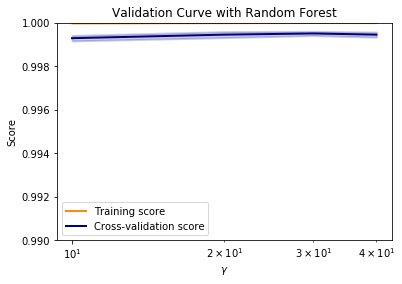

In [50]:
train_scores_mean = np.mean(train_scores_rf, axis=1)
train_scores_std = np.std(train_scores_rf, axis=1)
test_scores_mean = np.mean(test_scores_rf, axis=1)
test_scores_std = np.std(test_scores_rf, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.99, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# from the graph we can observe that the Performce/Accuracy is at the best when the parameter n_estimator = 30

In [129]:
result_proba = rf.predict_proba(X_test)[:,1] 

In [130]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9998889329038141

# Plotting AUC -ROC curve to check the overall accuracy of the Model

Text(0.5, 0, 'False Positive Rate')

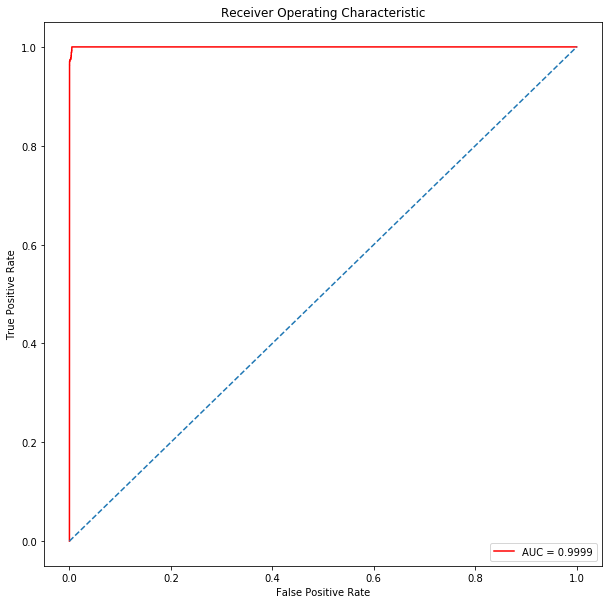

In [131]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model - XGboost

In [107]:
xgn_model = xgb.XGBClassifier(objective= "binary:logistic" , n_estimators= 123, learning_rate=0.01 )

In [108]:
xgn_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=123,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [109]:
result_xg = xgn_model.predict(X_test)

In [110]:
confusion_matrix(np.array(Y_test) , result_xg)

array([[24280,    46],
       [   36,   239]], dtype=int64)

In [111]:
metrics.accuracy_score(np.array(Y_test) ,result_xg)

0.9966668021625137

In [112]:
print(metrics.classification_report(np.array(Y_test) ,result_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24326
           1       0.84      0.87      0.85       275

    accuracy                           1.00     24601
   macro avg       0.92      0.93      0.93     24601
weighted avg       1.00      1.00      1.00     24601



In [121]:
train_scores, test_scores= validation_curve(
                                xgb.XGBClassifier(objective= "binary:logistic" , learning_rate=0.01 ),
                                X = X_train, y = Y_train, 
                                param_name = 'n_estimators', 
                                param_range = [10 , 20 , 30  , 100 , 200 , 300] ,cv = 3)

In [122]:
train_scores

array([[0.99644316, 0.99658544, 0.99652453],
       [0.99644316, 0.99658544, 0.99652453],
       [0.99644316, 0.99658544, 0.99652453],
       [0.99646349, 0.99658544, 0.99652453],
       [0.99808947, 0.99819109, 0.99798789],
       [0.99861791, 0.99863824, 0.99873989]])

In [123]:
test_scores

array([[0.99662615, 0.99638226, 0.99650407],
       [0.99662615, 0.99638226, 0.99650407],
       [0.99662615, 0.99638226, 0.99650407],
       [0.9965855 , 0.99638226, 0.99650407],
       [0.99808951, 0.99796756, 0.99821138],
       [0.9983334 , 0.99878054, 0.99853659]])

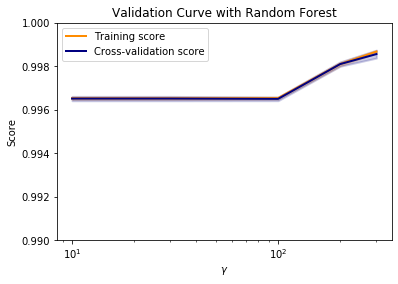

In [124]:
param_range = [10 , 20 , 30 , 100 , 200 , 300] 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.99, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [125]:
result_proba_xg = xgn_model.predict_proba(X_test)[:,1] 

In [126]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_xg)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9910078255215146

Text(0.5, 0, 'False Positive Rate')

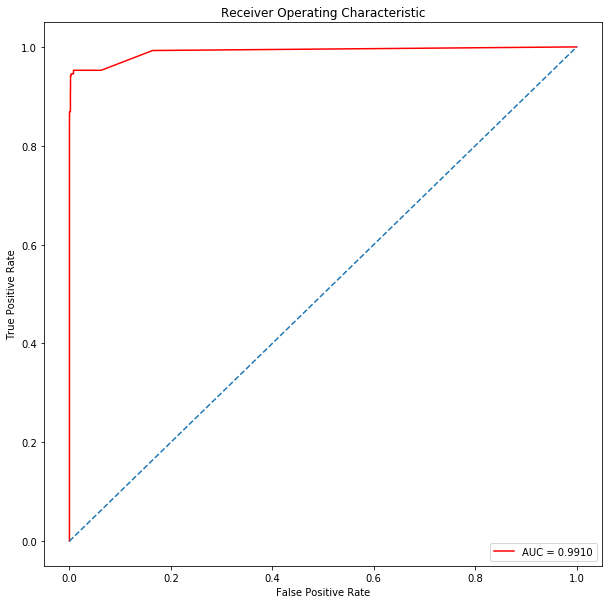

In [128]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model - Logistic Regression

In [132]:
lg_moded = LogisticRegression(max_iter= 150 )

In [133]:
lg_moded.fit(X_train , Y_train)

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
result_lg = lg_moded.predict(X_test)

In [135]:
confusion_matrix(np.array(Y_test) , result_lg)

array([[24283,    43],
       [   53,   222]], dtype=int64)

In [136]:
metrics.accuracy_score(np.array(Y_test) ,result_lg)

0.9960977196048941

In [137]:
print(metrics.classification_report(np.array(Y_test) ,result_lg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24326
           1       0.84      0.81      0.82       275

    accuracy                           1.00     24601
   macro avg       0.92      0.90      0.91     24601
weighted avg       1.00      1.00      1.00     24601



In [138]:
train_scores_lg, test_scores_lg= validation_curve(
                                LogisticRegression( ),
                                X = X_train, y = Y_train, 
                                param_name = 'max_iter', 
                                param_range = [10 , 20 , 30 , 40 , 100 , 200 , 300] ,cv = 3)

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mo

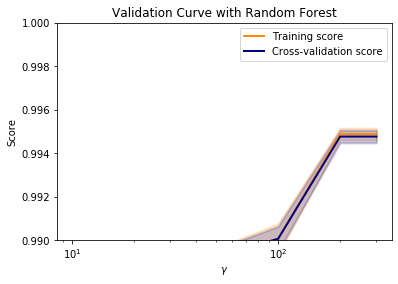

In [139]:
param_range = [10 , 20 , 30 , 40 , 100 , 200 , 300] 
train_scores_mean = np.mean(train_scores_lg, axis=1)
train_scores_std = np.std(train_scores_lg, axis=1)
test_scores_mean = np.mean(test_scores_lg, axis=1)
test_scores_std = np.std(test_scores_lg, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.99, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [140]:
result_proba_lg = lg_moded.predict_proba(X_test)[:,1] 

In [141]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_lg)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.991775952404087

Text(0.5, 0, 'False Positive Rate')

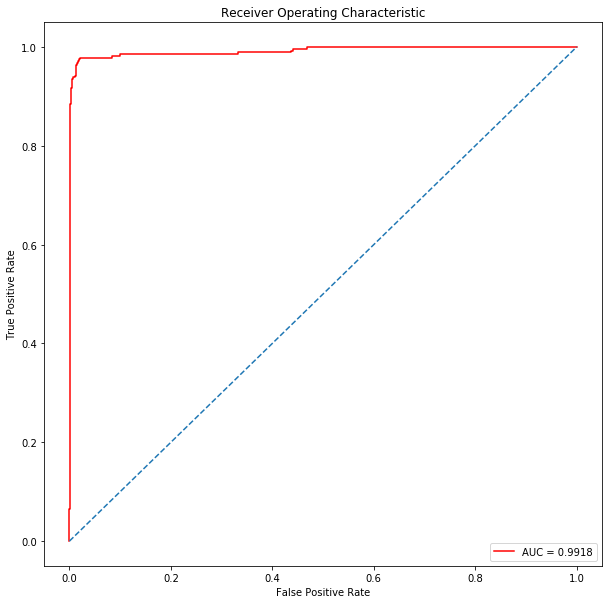

In [142]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Applying Random Forest on a Dataset(PCA)

# Generating Co variance Matrix for PCA component Analysis

In [143]:
covMatrix = np.cov(data_r2l, rowvar=False)
print(covMatrix)

[[ 1.87849017e+06  1.65429773e+02  5.54195944e+02  6.78750732e+01
   1.47277157e+07 -7.33034595e+04 -2.24167669e-03  0.00000000e+00
   6.30930995e-02  1.58967046e-01 -1.45241315e+02  3.67155969e+02
   7.38542117e-01  1.51493325e+00  2.46527589e+01 -9.06131693e-02
   2.45402554e+00  0.00000000e+00  0.00000000e+00  1.89547929e+00
  -2.11290398e+03 -3.57102745e-01 -8.80464137e+00 -8.73733391e+00
  -1.70072410e+01  1.61903424e+01 -2.84904905e+01  2.06968450e+04
  -4.30698281e+04 -1.77949810e+02  1.40547183e+02  1.68602201e+02
  -4.93990352e+00  7.97770704e-01 -1.16615657e+01 -9.71226825e+00
   3.88103657e+00]
 [ 1.65429773e+02  1.74924298e-01  5.34603988e-02  7.14373786e-02
  -7.55802979e+02 -7.41167332e+02 -1.84745471e-06  0.00000000e+00
  -1.10847282e-05 -1.36711648e-04 -1.31126793e-01 -5.27078828e-03
  -5.35761865e-05 -3.32541847e-05 -9.12642625e-04 -8.68303712e-05
  -9.18184989e-04  0.00000000e+00  0.00000000e+00 -1.26550647e-03
   8.38813898e-01 -3.44531828e-04 -1.01435972e-02 -1.0202

In [144]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-8.65929645e-04 -9.95308443e-06  9.99673249e-01  9.20948161e-03
   2.38264151e-02 -2.73508624e-04 -2.13358951e-04 -3.00805271e-05
   2.47957593e-05 -7.56487022e-05  2.67189676e-05  4.52097082e-05
  -4.09331219e-05 -2.98504231e-05  1.67140078e-05  1.17058787e-05
  -4.40229431e-06 -1.20834422e-06  1.38744675e-05  1.85355976e-06
  -2.49582722e-07  2.16265571e-06  1.83971557e-06  7.72825613e-07
   2.69072440e-07 -1.59581683e-08  3.17882557e-07 -1.50804113e-07
  -6.25482577e-09 -2.03606033e-07 -1.39049733e-07 -1.35539096e-07
   6.92923092e-07 -5.24986768e-08  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 4.43685325e-08 -1.35792095e-07  8.91238633e-05 -1.37253256e-03
  -7.83979094e-04 -1.79623723e-03 -1.88419849e-03  4.06698252e-03
  -7.79601835e-03  7.25889041e-01  1.17368720e-01  1.17570577e-01
  -3.91417251e-02  6.28173591e-01  1.07243484e-01  1.18819324e-01
   1.37405213e-02 -2.55725710e-02  1.49535837e-01  1.14871299e-02
  -1.27941928e-02  4.25279453e-03 -1.27

# Applying the Initial PCA with number of components as 10, so that we can construct Scree plot to choose the correct component


In [145]:
pca = PCA(n_components=10)

In [146]:
features.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       10     8        181       5450     0   
1         0              1       10     8        239        486     0   
2         0              1       10     8        235       1337     0   
3         0              1       10     8        219       1337     0   
4         0              1       10     8        217       2032     0   

   wrong_fragment  urgent  num_failed_logins  logged_in  lnum_compromised  \
0               0       0                  0          1                 0   
1               0       0                  0          1                 0   
2               0       0                  0          1                 0   
3               0       0                  0          1                 0   
4               0       0                  0          1                 0   

   lroot_shell  lsu_attempted  lnum_file_creations  lnum_shells  \
0            0              0                    0            0   
1            0              0                    0            0   
2            0              0                    0            0   
3            0              0                    0            0   
4            0              0                    0            0   

   lnum_access_files  lnum_outbound_cmds  is_host_login  is_guest_login  \
0                  0                   0              0               0   
1                  0                   0              0               0   
2                  0                   0              0               0   
3                  0                   0              0               0   
4                  0                   0              0               0   

   srv_count  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          8              0.0          0.0              0.0            1.0   
1          8              0.0          0.0              0.0            1.0   
2          8              0.0          0.0              0.0            1.0   
3          6              0.0          0.0              0.0            1.0   
4          6              0.0          0.0              0.0            1.0   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0            0.0                 0.0               9                   9   
1            0.0                 0.0              19                  19   
2            0.0                 0.0              29                  29   
3            0.0                 0.0              39                  39   
4            0.0                 0.0              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  
0                       0.0                   0.0                       0.0  
1                       0.0                   0.0                       0.0  
2                       0.0                   0.0                       0.0  
3                       0.0                   0.0                       0.0  
4                       0.0                   0.0                       0.0

In [147]:
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [148]:
print(pca.explained_variance_)

[1.70099499e+10 5.46526565e+09 1.86695011e+06 1.05447912e+04
 6.76948287e+03 4.45115991e+02 1.61419355e+01 1.23239837e+01
 2.54403174e+00 2.26970048e-01]


In [149]:
print(pca.explained_variance_ratio_)

[7.56767986e-01 2.43148163e-01 8.30600957e-05 4.69134853e-07
 3.01172428e-07 1.98030878e-08 7.18150263e-10 5.48290640e-10
 1.13183271e-10 1.00978349e-11]


In [150]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 75.67679857  99.99161484  99.99992085  99.99996776  99.99999788
  99.99999986  99.99999993  99.99999999 100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.        ]


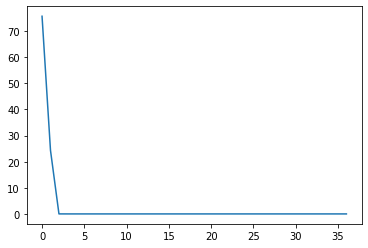

In [151]:
## ELBOW PLOT EXPLAINING THE VARIANCE_EXPLAINED BY THE EIGEN VECTORS
plt.plot(var_exp)

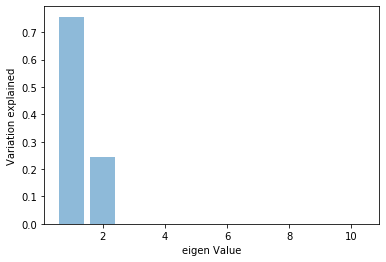

In [152]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()
# we see an elbow at 5 or 6

# With 2 components we are getting better variance coverage

[0.75676799 0.99991615 0.99999921 0.99999968 0.99999998 1.
 1.         1.         1.         1.        ]


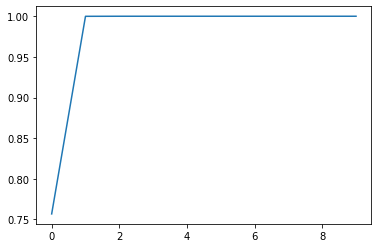

In [153]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [154]:
pca.components_

array([[ 8.65929645e-04, -4.43685323e-08, -3.87720953e-07,
         8.62219635e-08,  9.99998799e-01, -1.28500178e-03,
        -2.53955508e-12, -8.19200763e-39, -1.21318376e-11,
        -1.86022137e-10,  5.68399259e-08, -5.66266073e-09,
        -6.88251484e-11, -4.28683503e-11,  6.54983148e-11,
        -8.02952793e-12, -9.18061264e-10,  5.07340731e-40,
        -1.54611661e-39, -1.39568971e-09, -2.14073857e-06,
         3.26260560e-09, -1.24102000e-08, -1.24654793e-08,
         5.25686396e-10,  1.30855854e-09, -1.59764488e-08,
        -2.27204080e-05, -3.69949830e-05, -1.64992592e-08,
        -5.30242326e-09,  1.52000690e-07,  1.42522487e-08,
         4.22063338e-09, -1.31238929e-08, -1.36809343e-08],
       [-9.95308443e-06, -1.35792095e-07,  2.31770789e-07,
         2.84141729e-07,  1.28500914e-03,  9.99999173e-01,
        -7.77019815e-12, -1.32271536e-36,  2.67310668e-09,
         2.27817528e-08,  4.91711832e-08,  1.22341152e-06,
         9.81306940e-09,  1.77827889e-08,  1.08140074e-

# With choosing 2 as number of components , PCA is applied on the data

In [155]:
pca2 = PCA(n_components=2)
pca2.fit(data_r2l)
df_pca = pca2.transform(data_r2l)

In [156]:
df_pca

array([[-4.07674414e+03,  1.27146916e+03],
       [-4.01236606e+03, -3.69245280e+03],
       [-4.01746019e+03, -2.84145923e+03],
       [-4.03346076e+03, -2.84148037e+03],
       [-4.03635444e+03, -2.14648410e+03],
       [-4.03635503e+03, -2.14648469e+03],
       [-4.04123585e+03, -2.23848954e+03],
       [-4.09699529e+03, -9.15600220e+01],
       [-4.04093789e+03, -4.02749143e+03],
       [-4.03975424e+03, -3.39248967e+03],
       [-4.04154669e+03, -3.55449273e+03],
       [-4.07629609e+03, -2.19353679e+03],
       [-4.02973934e+03, -3.40547858e+03],
       [-3.99624783e+03, -3.00943445e+03],
       [-4.01007905e+03, -3.91945355e+03],
       [-3.99310742e+03, -2.34143106e+03],
       [-4.01008282e+03, -3.91745473e+03],
       [-3.99479920e+03, -3.36043525e+03],
       [-4.01807630e+03, -3.92346620e+03],
       [-4.01839686e+03, -3.67446699e+03],
       [-3.99638568e+03, -2.90543869e+03],
       [-4.01707809e+03, -3.92346667e+03],
       [-4.01008385e+03, -3.91945829e+03],
       [-4.

In [157]:
X_train , X_test , Y_train , Y_test = train_test_split(df_pca , target)

In [158]:
rf = RandomForestClassifier(n_estimators= 30 , max_depth=7)

rf.fit(X_train , Y_train)

result = rf.predict(X_test)

result

np.array(Y_test)

confusion_matrix(np.array(Y_test) , result)

metrics.accuracy_score(np.array(Y_test) ,result)

print(metrics.classification_report(np.array(Y_test) ,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24324
           1       1.00      0.93      0.96       277

    accuracy                           1.00     24601
   macro avg       1.00      0.97      0.98     24601
weighted avg       1.00      1.00      1.00     24601



In [159]:
metrics.accuracy_score(np.array(Y_test) ,result)

0.9991870249176863

# PCA on the data has the same effect as with out PCA and the accuracy is close to 99%

Text(0.5, 0, 'False Positive Rate')

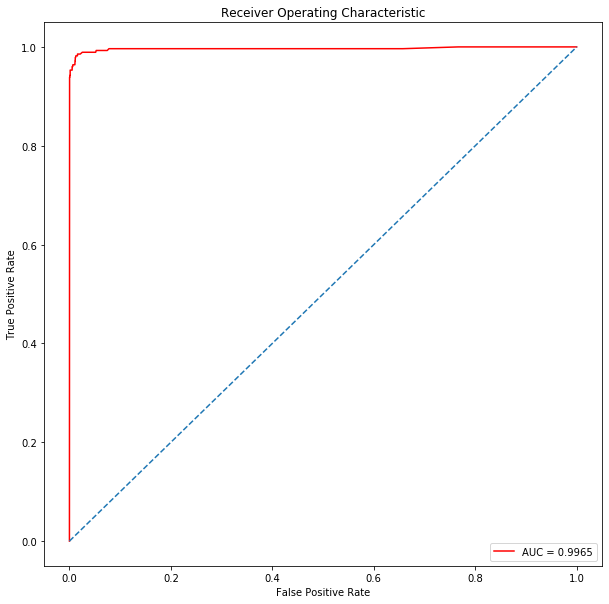

In [160]:
result_proba_rf_pca = rf.predict_proba(X_test)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_rf_pca)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Random Forest retained better AUC ROC score with the PCA applied Data

# XGboost Model with PCA data

In [163]:
xgn_model = xgb.XGBClassifier(objective= "binary:logistic" , n_estimators= 123, learning_rate=0.01 )

xgn_model.fit(X_train, Y_train)

result_xg = xgn_model.predict(X_test)

confusion_matrix(np.array(Y_test) , result_xg)

metrics.accuracy_score(np.array(Y_test) ,result_xg)



0.9948782569814235

In [164]:
print(metrics.classification_report(np.array(Y_test) ,result_xg))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24324
           1       0.99      0.55      0.71       277

    accuracy                           0.99     24601
   macro avg       0.99      0.77      0.85     24601
weighted avg       0.99      0.99      0.99     24601



Text(0.5, 0, 'False Positive Rate')

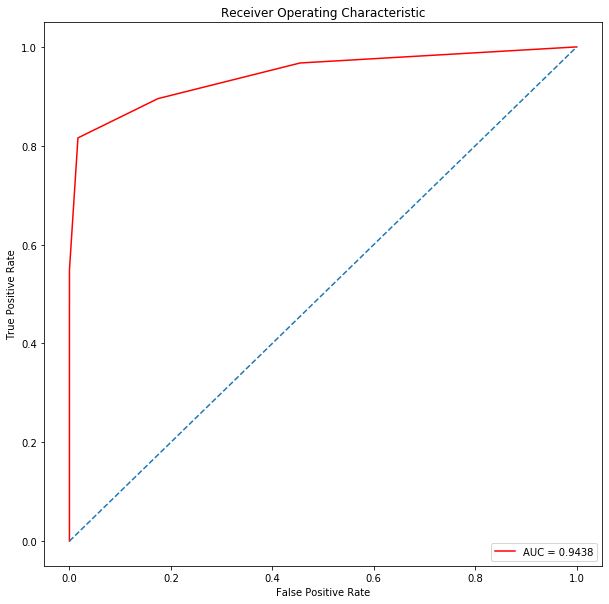

In [162]:
result_proba_xg_pca = xgn_model.predict_proba(X_test)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_xg_pca)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Accuracy and AUC , ROC score appears to drop with PCA applied Data

# Logistic Regression with PCA applied Data

In [165]:
lg_moded = LogisticRegression(max_iter= 150 )

lg_moded.fit(X_train , Y_train)

result_lg = lg_moded.predict(X_test)

confusion_matrix(np.array(Y_test) , result_lg)

metrics.accuracy_score(np.array(Y_test) ,result_lg)

print(metrics.classification_report(np.array(Y_test) ,result_lg))

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24324
           1       0.96      0.08      0.15       277

    accuracy                           0.99     24601
   macro avg       0.97      0.54      0.57     24601
weighted avg       0.99      0.99      0.99     24601



Text(0.5, 0, 'False Positive Rate')

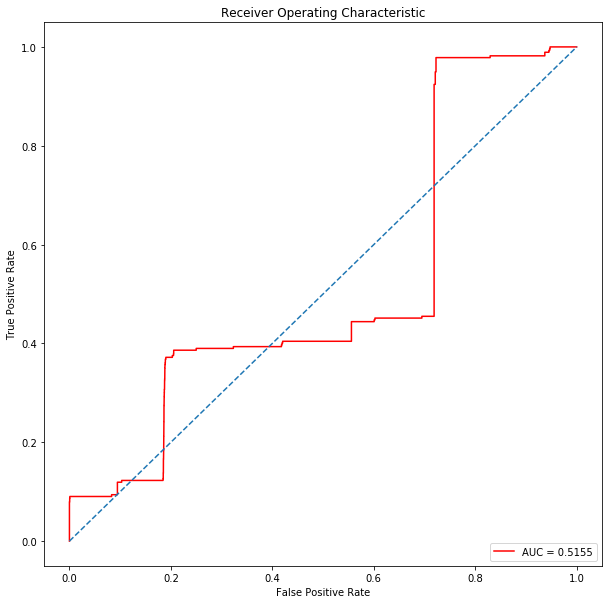

In [166]:
result_proba_lg_pca = lg_moded.predict_proba(X_test)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_lg_pca)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Accuracy and AUC ROC score dropped drastically with PCA applied Data

# Summary

1. Random forest performed well in both PCA and NON PCA data with high AUC and ROC score. For Random forest , Precision and Recall is high even when the data is imbalanced on the target classes

                    The overall accuracy is above 99% . AUC and ROC score is above 99 % on both the dataset

2. XGBoost , though performed well on non PCA data , the Precision and Recall dropped when we applied PCA on the data.

3. Logistic Regression performed moderatly well on Non PCA data , but Precision and Recall was less. For PCA data , the accuracy , AUC ROC score dropped very low with poor Precision and Recall.

Hence it can be concluded that Random Forest perform well and has overall better score on various accuracy metrics . There Random Forest model is robust and can be used to predict which transaction is normal and which one has r2L attack compared to other models for this dataset
